# Machine Learning Simple Classification Task

- Bagus Alwan Bambang
- Fathi Al Adha Hylmi
- Louis Widi Anandaputra
- Kreshnayogi Dava Berliasyach

## Betting on League of Legends Matches (through the first 10 minutes data)
<img src = 'https://upload.wikimedia.org/wikipedia/commons/thumb/d/d8/League_of_Legends_2019_vector.svg/640px-League_of_Legends_2019_vector.svg.png'>
Data source: https://www.kaggle.com/datasets/bobbyscience/league-of-legends-diamond-ranked-games-10-min/data 

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


from prettytable import PrettyTable

In [2]:
df = pd.read_csv('high_diamond_ranked_10min.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [21]:
# due to redundancy such as gold difference, first blood, and killing the dragon, several features are dropped
dropped_cols = ['gameId', 'blueGoldDiff', 'blueExperienceDiff', 'blueCSPerMin', 'blueGoldPerMin', 'blueTotalMinionsKilled',
                'redFirstBlood', 'redKills', 'redEliteMonsters', 'redDragons','redTotalMinionsKilled',
                'redTotalJungleMinionsKilled', 'redGoldDiff', 'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin', 'redHeralds']
df_clean = df.drop(dropped_cols, axis = 1)

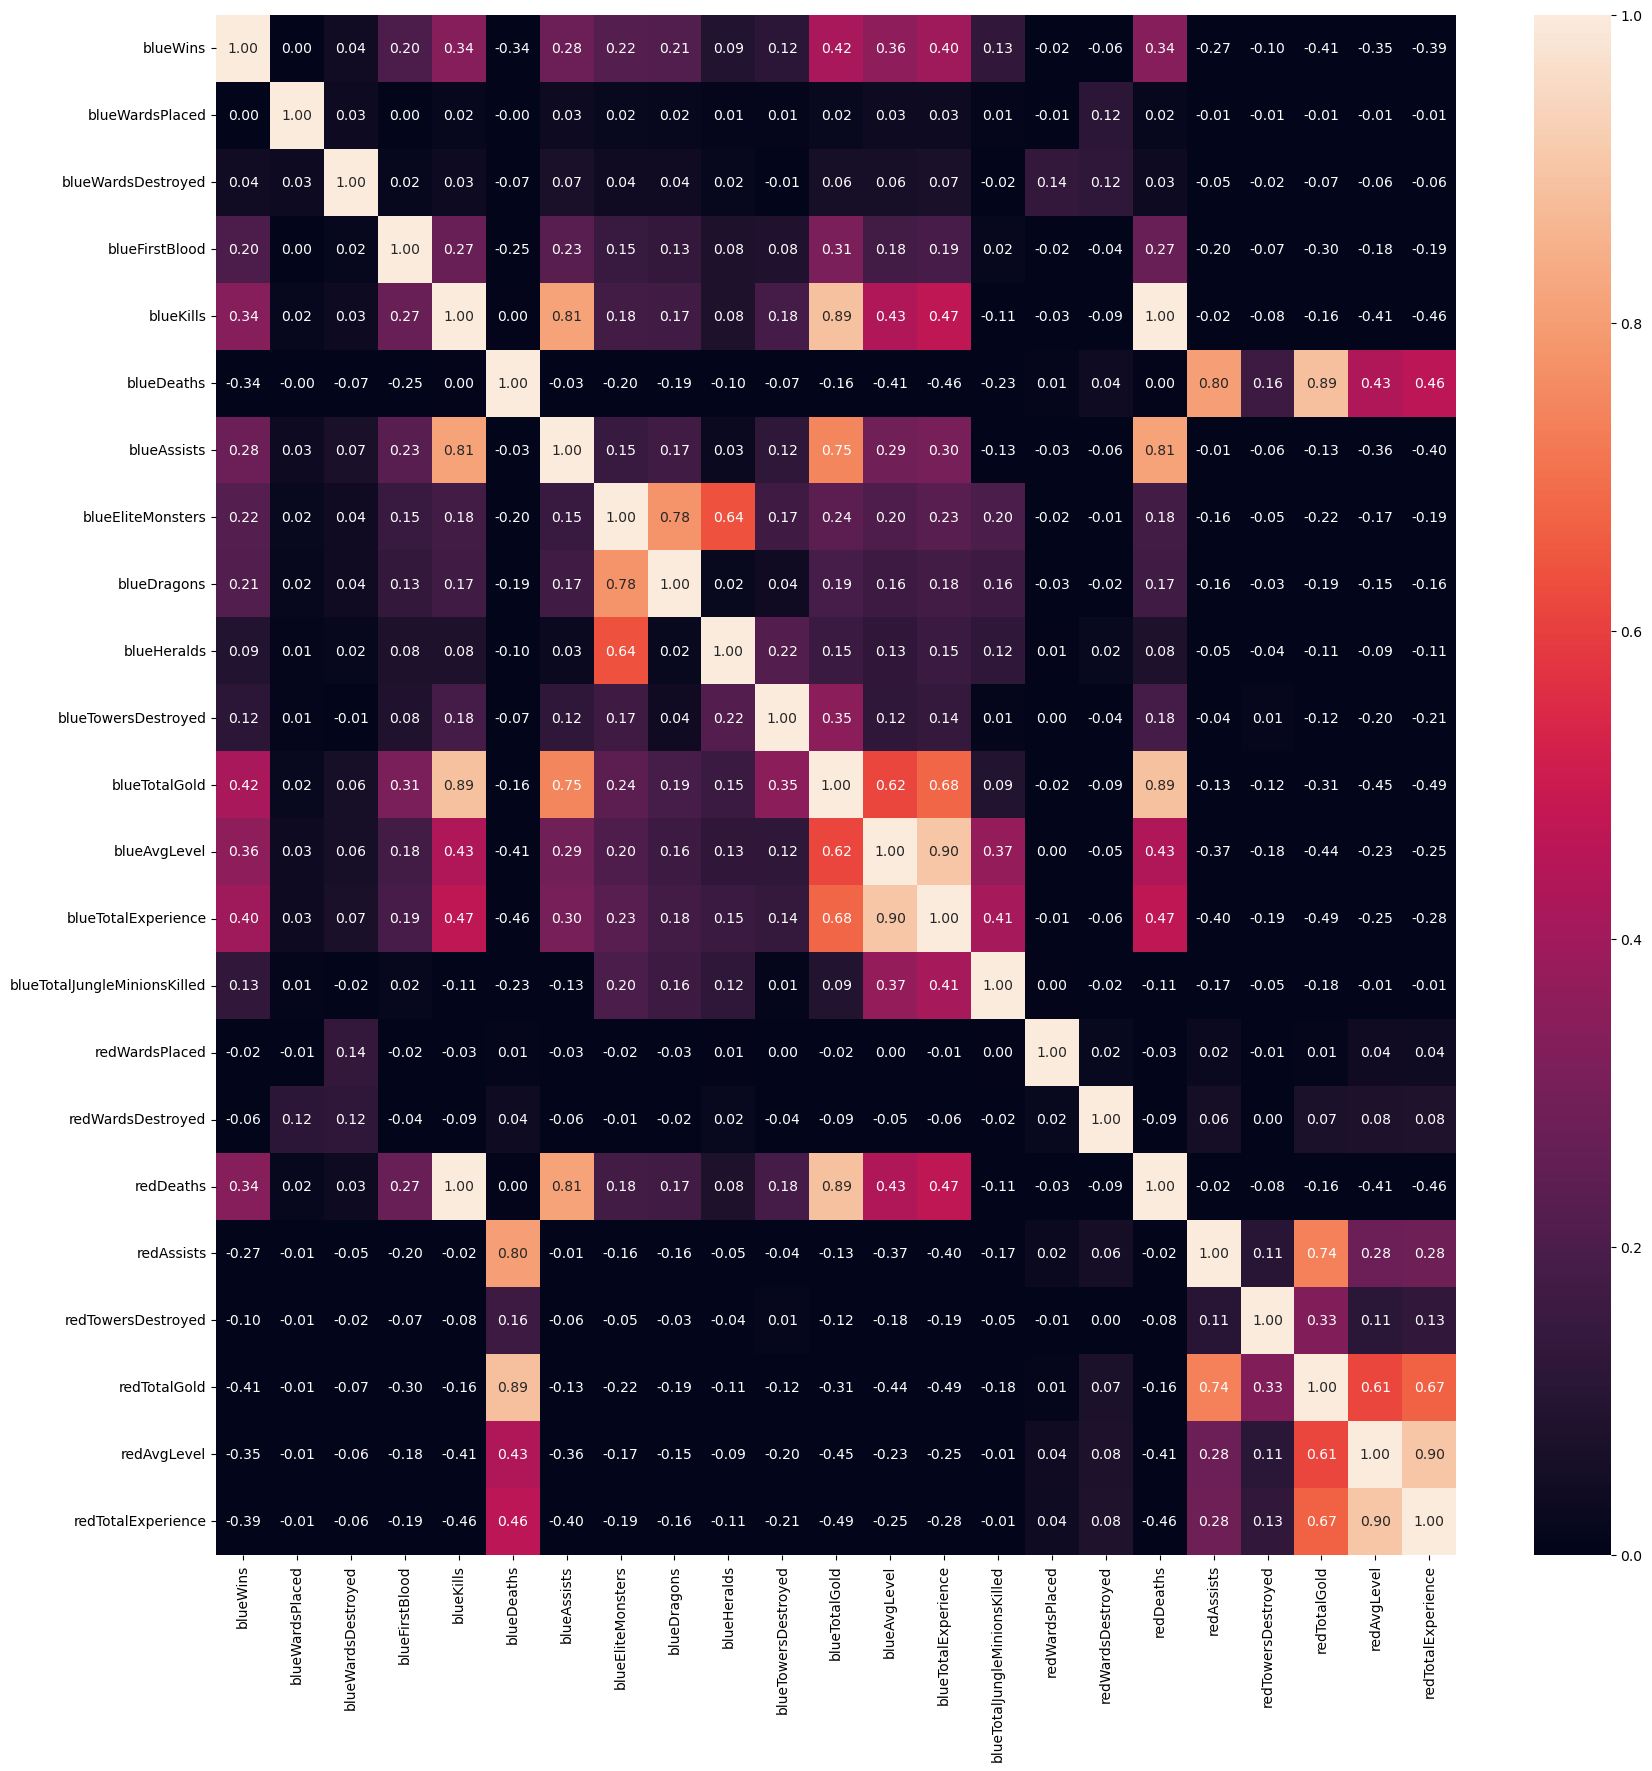

In [22]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_clean.corr(), annot=True, fmt='.2f', vmin=0);

In [23]:
# removing features that are redundant (highly correlated to each other) or in other words, high colinearity
cols = ['redWardsPlaced', 'redWardsDestroyed', # colinearity to the blue ones
        'blueAvgLevel', # colinearity with experience
        'redDeaths', 'redAssists', 'redTowersDestroyed','redTotalExperience', 'redTotalGold', 'redAvgLevel'] # colinearity with each other
df_clean = df_clean.drop(cols, axis=1)
df_clean

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueTotalExperience,blueTotalJungleMinionsKilled
0,0,28,2,1,9,6,11,0,0,0,0,17210,17039,36
1,0,12,1,0,5,5,5,0,0,0,0,14712,16265,43
2,0,15,0,0,7,11,4,1,1,0,0,16113,16221,46
3,0,43,1,0,4,5,5,1,0,1,0,15157,17954,55
4,0,75,4,0,6,6,6,0,0,0,0,16400,18543,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,1,17,2,1,7,4,5,1,1,0,0,17765,18967,69
9875,1,54,0,0,6,4,8,1,1,0,0,16238,19255,48
9876,0,23,1,0,6,7,5,0,0,0,0,15903,18032,45
9877,0,14,4,1,2,3,3,1,1,0,0,14459,17229,48


In [7]:
# train test split scale the set

y = df_clean['blueWins']
X = df_clean.drop(['blueWins'], axis = 1)
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# cross validation for hyperparameter tuning

hyperparameter_score_list_svm = []
for kernel in ['linear','rbf','poly', 'sigmoid']:
    for C in range(1, 11):
        svc = svm.SVC(C = C, kernel = kernel)
        scores = cross_validate(svc, X_train, y_train, cv=10, scoring='f1')
        mean_score = np.mean(scores['test_score'])
        hyperparameter_score_list_svm.append([kernel, C, mean_score])

In [9]:
myTable = PrettyTable(["Kernel", "C", "Avg F1"])
for row in hyperparameter_score_list_svm:
    myTable.add_row([row[0], row[1], row[2]])
print(myTable)

+---------+----+--------------------+
|  Kernel | C  |       Avg F1       |
+---------+----+--------------------+
|  linear | 1  | 0.7148883171823035 |
|  linear | 2  | 0.7163125498176065 |
|  linear | 3  | 0.7164686228649036 |
|  linear | 4  | 0.7166322752803069 |
|  linear | 5  | 0.7166149484203852 |
|  linear | 6  | 0.7169213171036837 |
|  linear | 7  | 0.716861902246904  |
|  linear | 8  | 0.7171004565638102 |
|  linear | 9  | 0.717263864353024  |
|  linear | 10 | 0.7170962333075104 |
|   rbf   | 1  | 0.711932548184605  |
|   rbf   | 2  | 0.7130424934987843 |
|   rbf   | 3  | 0.7120738814482237 |
|   rbf   | 4  | 0.7119288595131378 |
|   rbf   | 5  | 0.7119042897082231 |
|   rbf   | 6  | 0.7104101640122548 |
|   rbf   | 7  | 0.7110110158633642 |
|   rbf   | 8  | 0.7099385742847095 |
|   rbf   | 9  | 0.7092800592673447 |
|   rbf   | 10 | 0.708810084595937  |
|   poly  | 1  | 0.7029856557573558 |
|   poly  | 2  | 0.7046586650648567 |
|   poly  | 3  | 0.7062467187502889 |
|   poly  | 

In [10]:
max_index = 0
max = hyperparameter_score_list_svm[0][2]
for i in range(0, len(hyperparameter_score_list_svm)):
    if hyperparameter_score_list_svm[i][2]> max:
        max_index = i
        max = hyperparameter_score_list_svm[i][2]
    else: 
        continue
print(f"kernel : {hyperparameter_score_list_svm[max_index][0]}\nC: {hyperparameter_score_list_svm[max_index][1]}\nf1 : {hyperparameter_score_list_svm[max_index][2]}")

kernel : linear
C: 9
f1 : 0.717263864353024


In [11]:
svc = svm.SVC(C = 9, kernel = 'linear')
svc.fit(X_train, y_train)
pred_svm = svc.predict(X_test)

print(classification_report(y_test, pred_svm))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73       983
           1       0.73      0.73      0.73       993

    accuracy                           0.73      1976
   macro avg       0.73      0.73      0.73      1976
weighted avg       0.73      0.73      0.73      1976



In [12]:
# cross validation for hyperpars  v    ameter tuning
hyperparameter_score_list_knn = []
for p in range(1,4):
    for neighbor in range(2,50):
        knn = KNeighborsClassifier(p=p, n_neighbors=neighbor)
        scores = cross_validate(knn, X_train, y_train, cv=10, scoring='f1_macro')
        mean_score = np.mean(scores['test_score'])
        hyperparameter_score_list_knn.append([p, neighbor, mean_score])

In [13]:
myTable = PrettyTable(["p (distance)", "Number of neighbors", "Avg F1"])
for row in hyperparameter_score_list_knn:
    myTable.add_row([row[0], row[1], row[2]])
print(myTable)

+--------------+---------------------+--------------------+
| p (distance) | Number of neighbors |       Avg F1       |
+--------------+---------------------+--------------------+
|      1       |          2          | 0.6082821963721303 |
|      1       |          3          | 0.6609575645070618 |
|      1       |          4          | 0.6478785206845449 |
|      1       |          5          | 0.672055064592046  |
|      1       |          6          | 0.6705955364164894 |
|      1       |          7          | 0.6786280996884978 |
|      1       |          8          | 0.6770054796548696 |
|      1       |          9          | 0.6836581669875164 |
|      1       |          10         | 0.683939056506172  |
|      1       |          11         | 0.6907367412874084 |
|      1       |          12         | 0.6899676974492477 |
|      1       |          13         | 0.6931647012824558 |
|      1       |          14         | 0.6948502543619266 |
|      1       |          15         | 0

In [14]:
max_index = 0
max = hyperparameter_score_list_knn[0][2]
for i in range(0, len(hyperparameter_score_list_knn)):
    if hyperparameter_score_list_knn[i][2]> max:
        max_index = i
        max = hyperparameter_score_list_knn[i][2]
    else: 
        continue
print(f"Distance: {hyperparameter_score_list_knn[max_index][0]}\nNumber of Neighbors: {hyperparameter_score_list_knn[max_index][1]}\nf1 : {hyperparameter_score_list_knn[max_index][2]}")

Distance: 1
Number of Neighbors: 41
f1 : 0.7140449353625405


In [15]:
knn = KNeighborsClassifier(p = 1, n_neighbors=41)
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)

print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72       983
           1       0.72      0.72      0.72       993

    accuracy                           0.72      1976
   macro avg       0.72      0.72      0.72      1976
weighted avg       0.72      0.72      0.72      1976



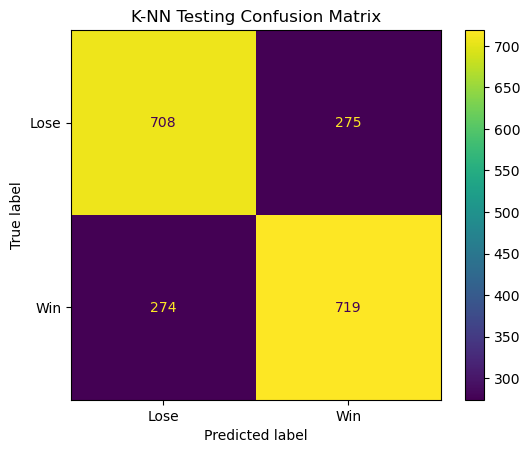

In [32]:
confusion_matrix_knn = confusion_matrix(y_pred=pred_knn, y_true=y_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_knn, display_labels = ['Lose', 'Win'])
cm_display.plot()
plt.title("K-NN Testing Confusion Matrix")
plt.show()

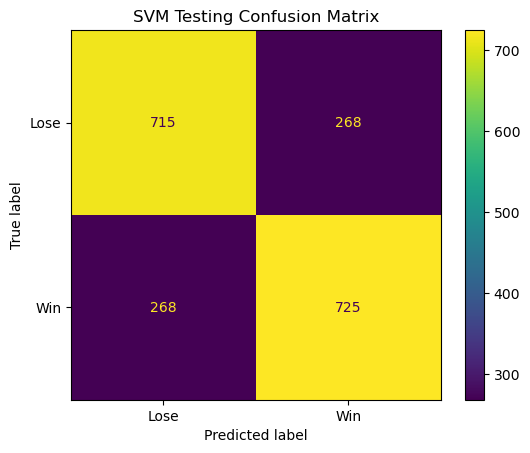

In [31]:
confusion_matrix_svm = confusion_matrix(y_pred=pred_svm, y_true=y_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_svm, display_labels = ['Lose', 'Win'])
cm_display.plot()
plt.title("SVM Testing Confusion Matrix")
plt.show()

© 2024